<a href="https://colab.research.google.com/github/Oreki820/Projetos-EBAC/blob/main/Profissao_Cientista_de_Dados_M34_Pratique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **M√ìDULO 34 - Regress√£o: Conceitos Avan√ßados**

Para essa atividade voc√™s trabalhar√£o com a mesma base que usamos na aula, para previs√£o do aluguel.

Durante a aula montamos um modelo de regress√£o polinomial utilizando a variavel Valor Condominio para prever a variavel valor aluguel. Nessa atividade voc√™s devem escolher outra v√°riavel dessa base para realizar a previs√£o do valor do aluguel.


# 1 - Realize a importa√ß√£o das bibliotecas necess√°rias, carrega a base de dados e separe em X e Y, selecionando uma das v√°riaveis para X n√£o sendo a usada durante a aula.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score

In [5]:
# baixando o data set
df = pd.read_csv("/content/ALUGUEL_MOD12 (1).csv", delimiter=';')

df.head(10)

Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_banheiros  \
0            480               295        48          2            2   
1            500                 0        50          1            2   
2            500                 0        40          1            2   
3            500                36        45          1            2   
4            500                 0        30          1            1   
5            500               380        66          2            1   
6            550               100        48          2            2   
7            600               110        46          2            2   
8            600               100        49          2            2   
9            600               325        50          2            2   

   N_Suites  N_Vagas  
0         1        1  
1         1        1  
2         1        1  
3         1        0  
4         0        0  
5         0        1  
6         1        1  
7         1        1  
8         1        1  
9         1        1

In [6]:
# y = vari√°vel alvo (Valor do Aluguel)
y = df["Valor_Aluguel"]

In [7]:
# X = vari√°vel explicativa escolhida (Metragem)
X = df[["Metragem"]]

In [8]:
# Exibindo as 5 primeiras linhas para conferir
print(df.head())
print("\nX (Metragem):")
print(X.head())
print("\ny (Valor_Aluguel):")
print(y.head())

   Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_banheiros  \
0            480               295        48          2            2   
1            500                 0        50          1            2   
2            500                 0        40          1            2   
3            500                36        45          1            2   
4            500                 0        30          1            1   

   N_Suites  N_Vagas  
0         1        1  
1         1        1  
2         1        1  
3         1        0  
4         0        0  

X (Metragem):
   Metragem
0        48
1        50
2        40
3        45
4        30

y (Valor_Aluguel):
0    480
1    500
2    500
3    500
4    500
Name: Valor_Aluguel, dtype: int64


# 2 - Fa√ßa o procecssamento dos dados utilizando o Polynomial Feature, com degree = 2.

In [13]:
# Criando o transformadondo polinomial com grau 2
poly2 = PolynomialFeatures(degree=2)

In [14]:
# Aplicando a transforma√ß√£o em X (Metragem)
X_poly2 = poly2.fit_transform(X)

In [15]:
#Verificando o resultado
print("Formato original de X:", X.shape)
print("Novo formato de X ap√≥s PolynomialFeatures (degree=2):", X_poly2.shape)

# Exibindo algumas linhas transformadas
print("\nExemplo das primeiras linhas (Metragem e Metragem^2):")
print(X_poly2[:5])

Formato original de X: (7203, 1)
Novo formato de X ap√≥s PolynomialFeatures (degree=2): (7203, 3)

Exemplo das primeiras linhas (Metragem e Metragem^2):
[[1.000e+00 4.800e+01 2.304e+03]
 [1.000e+00 5.000e+01 2.500e+03]
 [1.000e+00 4.000e+01 1.600e+03]
 [1.000e+00 4.500e+01 2.025e+03]
 [1.000e+00 3.000e+01 9.000e+02]]


# 3 - Separe os dados em treino e teste e realize o treinamento do modelo.

In [17]:
# Separando os dados em treino e teste (80% treino, 20% teste)
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X_poly2,
    y,
    test_size=0.2,
    random_state=42
)

In [18]:
# Criando o modelo de Regress√£o
modelo = LinearRegression()
# Treinando o modelo
modelo.fit(X_treino, y_treino)

LinearRegression()

In [19]:
print("Coeficientes do modelo:", modelo.coef_)
print("Intercepto:", modelo.intercept_)

Coeficientes do modelo: [ 0.00000000e+00  4.42826866e+01 -2.89778247e-02]
Intercepto: -632.1353054871074


4 - Fa√ßa as previs√µes para a base de teste e avalie os resultados obtidos, n√£o se esque√ßa de plotar o gr√°fico da regress√£o.

In [21]:
y_pred = modelo.predict(X_teste)

In [22]:
r2 = r2_score(y_teste, y_pred)
mse = mean_squared_error(y_teste, y_pred)
mae = mean_absolute_error(y_teste, y_pred)

In [23]:
print(f"R¬≤: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

R¬≤: 0.5711
MSE: 4645995.5646
MAE: 1225.4696


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


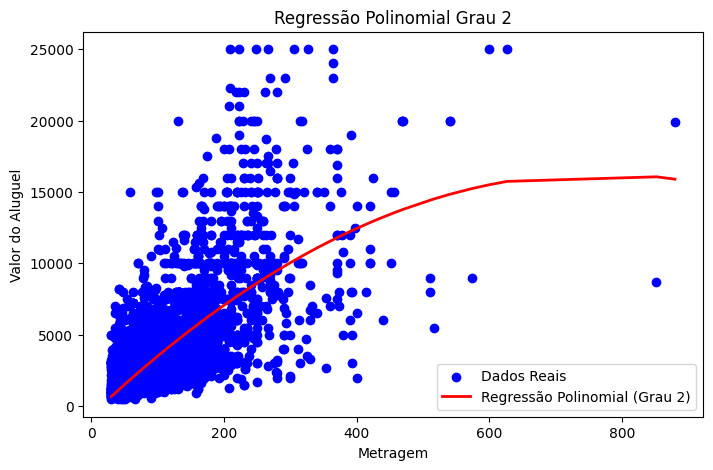

In [24]:
X_original = X.values.reshape(-1, 1)

X_sorted_index = np.argsort(X_original[:, 0])
X_sorted = X_original[X_sorted_index]

X_sorted_poly = poly2.transform(X_sorted)

y_sorted_pred = modelo.predict(X_sorted_poly)

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Dados Reais')
plt.plot(X_sorted, y_sorted_pred, color='red', linewidth=2, label='Regress√£o Polinomial (Grau 2)')
plt.xlabel("Metragem")
plt.ylabel("Valor do Aluguel")
plt.title("Regress√£o Polinomial Grau 2")
plt.legend()
plt.show()

# 5 - Refa√ßa os passos anteriores, rodando um novo modelo, por√©m testando agora na fase de processamento o degree = 4. Avalie se o resultado desse novo modelo est√° superior ao anterior.

In [25]:
poly4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly4 = poly4.fit_transform(X)

In [26]:
X_treino4, X_teste4, y_treino4, y_teste4 = train_test_split(
    X_poly4, y, test_size=0.2, random_state=42
)

In [27]:
modelo4 = LinearRegression()
modelo4.fit(X_treino4, y_treino4)

LinearRegression()

In [28]:
y_pred4 = modelo4.predict(X_teste4)

In [29]:
r2_4 = r2_score(y_teste4, y_pred4)
mse_4 = mean_squared_error(y_teste4, y_pred4)
mae_4 = mean_absolute_error(y_teste4, y_pred4)

In [30]:
print("=== RESULTADOS MODELO GRAU 4 ===")
print(f"R¬≤: {r2_4:.4f}")
print(f"MSE: {mse_4:.4f}")
print(f"MAE: {mae_4:.4f}")

=== RESULTADOS MODELO GRAU 4 ===
R¬≤: 0.5585
MSE: 4782486.1081
MAE: 1194.1280


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


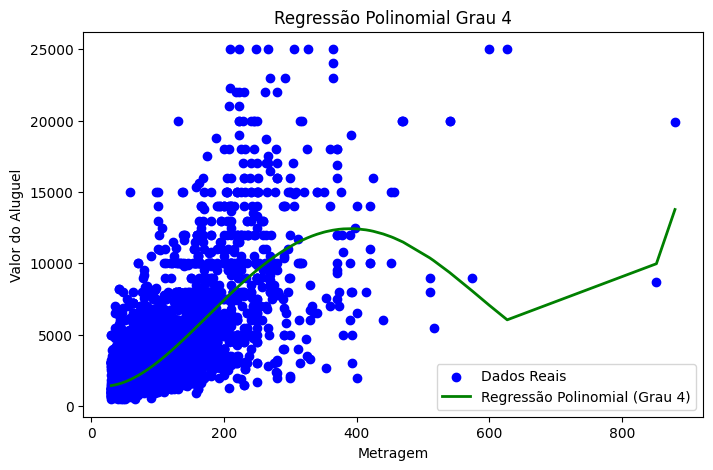

In [31]:
X_sorted = X_original[X_sorted_index]
X_sorted_poly4 = poly4.transform(X_sorted)
y_sorted_pred4 = modelo4.predict(X_sorted_poly4)

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Dados Reais')
plt.plot(X_sorted, y_sorted_pred4, color='green', linewidth=2, label='Regress√£o Polinomial (Grau 4)')
plt.xlabel("Metragem")
plt.ylabel("Valor do Aluguel")
plt.title("Regress√£o Polinomial Grau 4")
plt.legend()
plt.show()

In [32]:
#Comparando com o modelo anterior (grau 2)
print("\n=== COMPARA√á√ÉO ENTRE MODELOS ===")
print(f"R¬≤ grau 2: {r2:.4f}")
print(f"R¬≤ grau 4: {r2_4:.4f}")

if r2_4 > r2:
    print("‚úÖ O modelo de grau 4 teve desempenho MELHOR que o de grau 2.")
else:
    print("‚ö†Ô∏è O modelo de grau 4 N√ÉO melhorou o desempenho em rela√ß√£o ao grau 2.")


=== COMPARA√á√ÉO ENTRE MODELOS ===
R¬≤ grau 2: 0.5711
R¬≤ grau 4: 0.5585
‚ö†Ô∏è O modelo de grau 4 N√ÉO melhorou o desempenho em rela√ß√£o ao grau 2.


# 6 - Explique com suas palavras o conceito e a diferen√ßa entre Elastic Net, Ridge e Lasso.

Quando eu treino modelos de regress√£o, √†s vezes eles sofrem **overfitting**, principalmente quando tenho muitas vari√°veis ou quando algumas delas s√£o parecidas entre si. Para resolver isso, eu posso aplicar regulariza√ß√£o, que √© uma forma de ‚Äúpunir‚Äù coeficientes muito grandes no modelo.

**Ridge (L2):**

No Ridge, a regulariza√ß√£o penaliza os coeficientes grandes, mas n√£o zera nenhum deles. Ou seja, todas as vari√°veis continuam no modelo, s√≥ que com pesos menores. Eu uso Ridge quando quero reduzir overfitting, mas n√£o quero perder nenhuma vari√°vel. Funciona bem quando as vari√°veis est√£o correlacionadas.

**Lasso (L1):**

O Lasso tamb√©m penaliza os coeficientes, mas de uma forma que pode zerar completamente alguns deles. Na pr√°tica, ele faz uma sele√ß√£o de vari√°veis automaticamente. Eu uso Lasso quando quero um modelo mais simples, com menos vari√°veis, e entender quais features s√£o realmente importantes.

**Elastic Net (L1 + L2):**

O Elastic Net combina Ridge e Lasso ao mesmo tempo. Ele reduz overfitting e pode eliminar vari√°veis irrelevantes. Eu gosto de usar Elastic Net quando tenho muitas vari√°veis, algumas correlacionadas e quero um equil√≠brio entre reduzir complexidade e selecionar features.

‚úÖ Em resumo:

Ridge: mant√©m todas as vari√°veis, s√≥ diminui os pesos.

Lasso: pode eliminar vari√°veis, deixando o modelo mais simples.

Elastic Net: mistura os dois e costuma ser o mais equilibrado.

# **M√≥dulo Extra - Testando Curiosidades**

m√≥dulo criado por mim mesmp para testes

**ETAPA EXTRA 1 ‚Äì Testar graus 1 a 6 automaticamente**

Objetivo:

Gerar PolynomialFeatures para cada grau (1 a 6)

Treinar o modelo

Calcular m√©tricas (R¬≤, MSE, MAE)

Salvar tudo em uma tabela

Mostrar qual grau foi o melhor

In [42]:
# Garantindo que temos X e y corretos
X = df[["Metragem"]]
y = df["Valor_Aluguel"]

# Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Lista para armazenar os resultados
resultados = []

# Testando graus de 1 a 6
for grau in range(1, 7):
    modelo = Pipeline([
        ('poly', PolynomialFeatures(degree=grau, include_bias=False)),
        ('linear', LinearRegression())
    ])

    # Treinando
    modelo.fit(X_train, y_train)

    # Prevendo
    y_pred = modelo.predict(X_test)

    # Calculando as m√©tricas
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Armazenar resultado
    resultados.append({
        "Grau": grau,
        "R¬≤": r2,
        "MSE": mse,
        "MAE": mae
    })

# Convertendo para DataFrame
tabela_resultados = pd.DataFrame(resultados)
print(tabela_resultados)

# Melhor grau baseado no R¬≤
melhor_grau = tabela_resultados.loc[tabela_resultados["R¬≤"].idxmax()]
print("\nMelhor modelo encontrado:")
print(melhor_grau)


   Grau        R¬≤           MSE          MAE
0     1  0.569799  4.659582e+06  1211.910046
1     2  0.571054  4.645996e+06  1225.469554
2     3  0.558009  4.787286e+06  1213.825190
3     4  0.558452  4.782486e+06  1194.128016
4     5  0.567534  4.684120e+06  1196.858535
5     6  0.449612  5.961353e+06  1209.669765

Melhor modelo encontrado:
Grau    2.000000e+00
R¬≤      5.710538e-01
MSE     4.645996e+06
MAE     1.225470e+03
Name: 1, dtype: float64


A regress√£o linear j√° explica bem a rela√ß√£o entre metragem e aluguel, mas adicionar termos quadr√°ticos (grau 2) traz uma leve melhoria, capturando uma curvatura natural nos dados. A partir do grau 3, o modelo come√ßa a sofrer overfitting, perdendo capacidade de generalizar. O grau 6 mostra overfitting extremo, com forte queda no R¬≤. Portanto, o melhor modelo √© o grau 2, pois oferece o melhor equil√≠brio entre desempenho e simplicidade

**ETAPA EXTRA 2 ‚Äì Cross-Validation (K-Fold)**

Objetivo:

Avaliar o modelo de forma mais confi√°vel e robusta do que apenas usando um √∫nico treino/teste.

Em vez de dividir os dados 1 vez, o K-Fold:

Divide o dataset em K partes (ex: 5 folds)

Treina 5 vezes em combina√ß√µes diferentes

Faz m√©dia dos resultados

In [47]:
# Criando K-Fold (5 divis√µes)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

resultados_cv = []

# Testando graus de 1 a 6
for grau in range(1, 7):
    modelo = Pipeline([
        ('poly', PolynomialFeatures(degree=grau, include_bias=False)),
        ('linear', LinearRegression())
    ])

    # Cross-validation com R¬≤
    scores = cross_val_score(modelo, X, y, cv=kfold, scoring='r2')

    # Armazenando m√©dias e desvios
    resultados_cv.append({
        "Grau": grau,
        "R¬≤ M√©dio (CV)": scores.mean(),
        "Desvio Padr√£o": scores.std()
    })

    # Mostrando os resultados
tabela_cv = pd.DataFrame(resultados_cv)
print(tabela_cv)

# Melhor grau pelo R¬≤ m√©dio
melhor_grau_cv = tabela_cv.loc[tabela_cv["R¬≤ M√©dio (CV)"].idxmax()]
print("\nMelhor modelo com Cross-Validation:")
print(melhor_grau_cv)


   Grau  R¬≤ M√©dio (CV)  Desvio Padr√£o
0     1       0.532235       0.039413
1     2       0.536030       0.031649
2     3       0.538152       0.025824
3     4       0.545193       0.022453
4     5       0.546438       0.026382
5     6       0.509873       0.054660

Melhor modelo com Cross-Validation:
Grau             5.000000
R¬≤ M√©dio (CV)    0.546438
Desvio Padr√£o    0.026382
Name: 4, dtype: float64


A an√°lise com treino/teste √∫nico apontou o grau 2 como melhor modelo, por√©m a cross-validation mostrou que o grau 5 apresenta melhor desempenho m√©dio e maior estabilidade. Isso evidencia a import√¢ncia de avaliar modelos com t√©cnicas mais robustas, como K-Fold, antes de decidir o grau ideal. O grau 6 sofre overfitting, enquanto o grau 5 atinge o melhor equil√≠brio entre desempenho e generaliza√ß√£o.

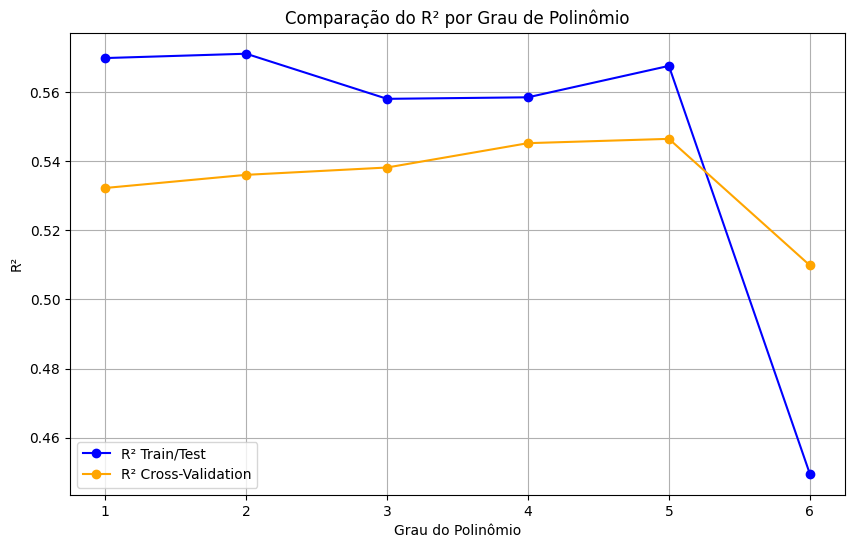

In [49]:
import matplotlib.pyplot as plt

r2_treino_teste = tabela_resultados["R¬≤"].values

# Resultados do cross-validation
r2_cv = tabela_cv["R¬≤ M√©dio (CV)"].values

# Graus de polin√¥mio (1 a 6)
graus = tabela_resultados["Grau"].values

# Criando o gr√°fico
plt.figure(figsize=(10,6))
plt.plot(graus, r2_treino_teste, marker='o', label='R¬≤ Train/Test', color='blue')
plt.plot(graus, r2_cv, marker='o', label='R¬≤ Cross-Validation', color='orange')


plt.title("Compara√ß√£o do R¬≤ por Grau de Polin√¥mio")
plt.xlabel("Grau do Polin√¥mio")
plt.ylabel("R¬≤")
plt.xticks(graus)
plt.legend()
plt.grid(True)
plt.show()


O gr√°fico mostra claramente que:

R¬≤ (train/test) tem uma leve oscila√ß√£o, mas despenca no grau 6, indicando overfitting extremo.

R¬≤ (cross-validation) sobe de forma mais est√°vel at√© o grau 5, mostrando que o modelo realmente melhora de forma consistente at√© esse ponto.

O grau 5 √© o melhor em generaliza√ß√£o, enquanto o grau 2 s√≥ parecia o melhor no train/test √∫nico.

Conclus√£o:

Cross-Validation revelou a verdade: modelos simples (grau 1 e 2) s√£o bons, mas o grau 5 oferece o melhor equil√≠brio entre desempenho e estabilidade.

J√° o grau 6 come√ßa a aprender ‚Äúru√≠do‚Äù, perdendo capacidade de generaliza√ß√£o.

**ETAPA EXTRA 3 ‚Äì GR√ÅFICOS DE RES√çDUOS**

o que vamos comparar nesses gr√°ficos:

üîµ Modelo Grau 2

Se os res√≠duos estiverem espalhados aleatoriamente, o modelo √© adequado.

Se houver curva ou padr√£o, o modelo n√£o capturou alguma rela√ß√£o n√£o linear.

üü¢ Modelo Grau 5

Pode ter res√≠duos menores (bom)

MAS se come√ßar a ter padr√µes estranhos ou pontos extremos, pode ter come√ßado a aprender ru√≠do (overfitting!)

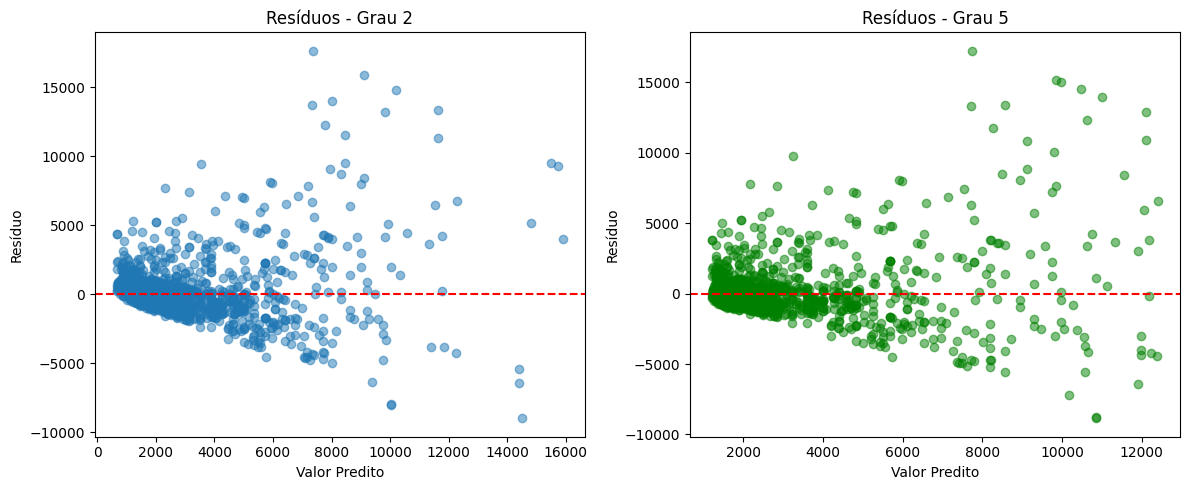

In [50]:
# Modelo Grau 2
modelo_2 = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear', LinearRegression())
])
modelo_2.fit(X_train, y_train)
y_pred2 = modelo_2.predict(X_test)
residuos2 = y_test - y_pred2

# Modelo Grau 5
modelo_5 = Pipeline([
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('linear', LinearRegression())
])
modelo_5.fit(X_train, y_train)
y_pred5 = modelo_5.predict(X_test)
residuos5 = y_test - y_pred5

# Plot dos res√≠duos
plt.figure(figsize=(12,5))

# Res√≠duos Grau 2
plt.subplot(1, 2, 1)
plt.scatter(y_pred2, residuos2, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Res√≠duos - Grau 2")
plt.xlabel("Valor Predito")
plt.ylabel("Res√≠duo")

# Res√≠duos Grau 5
plt.subplot(1, 2, 2)
plt.scatter(y_pred5, residuos5, alpha=0.5, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Res√≠duos - Grau 5")
plt.xlabel("Valor Predito")
plt.ylabel("Res√≠duo")

plt.tight_layout()
plt.show()


O modelo de grau 5 apresenta res√≠duos um pouco mais centrados e distribui melhor os erros do que o grau 2, confirmando a an√°lise do cross-validation. No entanto, ambos os modelos ainda sofrem com heterocedasticidade e outliers, o que indica que apenas aumentar o grau do polin√¥mio n√£o √© suficiente. Para melhorar de verdade, seria necess√°rio adicionar mais vari√°veis (multivariado) ou aplicar t√©cnicas de regulariza√ß√£o ou transforma√ß√£o

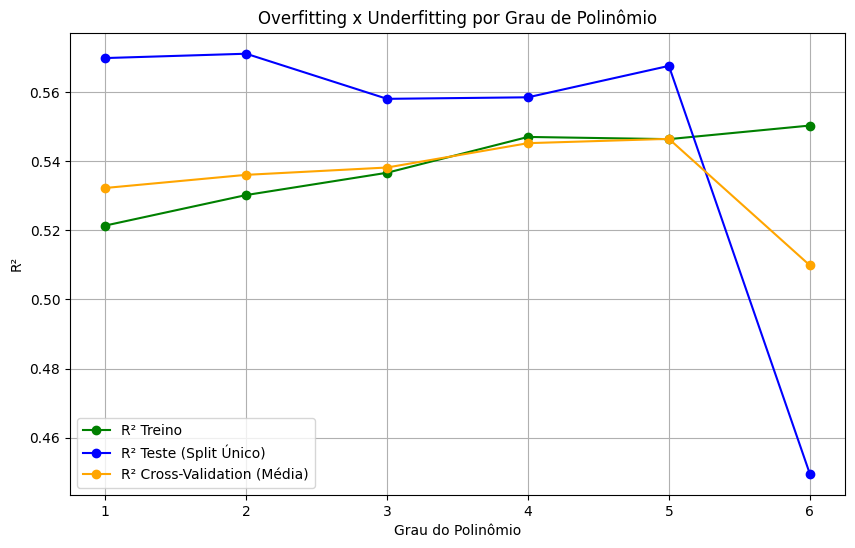

In [53]:
# R¬≤ Treino para cada grau
r2_treino = []
for grau in range(1,7):
    modelo = Pipeline([
        ('poly', PolynomialFeatures(degree=grau, include_bias=False)),
        ('linear', LinearRegression())
    ])
    modelo.fit(X_train, y_train)
    r2_treino.append(modelo.score(X_train, y_train))  # score = R¬≤ no treino

# R¬≤ Teste (tabela_resultados)
r2_teste = tabela_resultados["R¬≤"].values

# Cross-Validation (tabela_cv)
r2_cv = tabela_cv["R¬≤ M√©dio (CV)"].values

# Graus (1 a 6)
graus = tabela_resultados["Grau"].values

# Criando gr√°fico
plt.figure(figsize=(10,6))
plt.plot(graus, r2_treino, marker='o', label='R¬≤ Treino', color='green')
plt.plot(graus, r2_teste, marker='o', label='R¬≤ Teste (Split √önico)', color='blue')
plt.plot(graus, r2_cv, marker='o', label='R¬≤ Cross-Validation (M√©dia)', color='orange')

plt.title("Overfitting x Underfitting por Grau de Polin√¥mio")
plt.xlabel("Grau do Polin√¥mio")
plt.ylabel("R¬≤")
plt.xticks(graus)
plt.grid(True)
plt.legend()
plt.show()

Nesse gr√°fico eu consigo visualizar claramente como o grau do polin√¥mio afeta o comportamento do modelo. A linha verde (R¬≤ Treino) sobe continuamente, o que mostra que, quanto mais complexo o modelo fica, melhor ele se adapta aos dados de treino. Isso √© esperado, porque modelos mais complexos t√™m mais capacidade de "decorar" os dados.

Por√©m, a linha azul (R¬≤ Teste com split √∫nico) mostra que depois do grau 2 o desempenho come√ßa a oscilar e no grau 6 despenca drasticamente. Isso √© um forte sinal de overfitting, porque o modelo aprendeu demais o treino e perdeu a capacidade de generaliza√ß√£o.

A linha laranja (R¬≤ Cross-Validation) √© a mais confi√°vel, pois avalia o modelo em v√°rias divis√µes dos dados. Ela mostra que o desempenho melhora de forma est√°vel at√© o grau 5, atingindo seu melhor valor antes de cair no grau 6. Isso prova que o grau 5 √© o melhor equil√≠brio entre capacidade de aprender padr√µes e generalizar bem.

# **Finaliza√ß√£o**

Nesse m√≥dulo de Regress√£o Polinomial, eu aprendi que nem sempre aumentar a complexidade do modelo significa melhorar o resultado. Comecei testando apenas a vari√°vel Metragem para prever o valor do aluguel e fui aumentando o grau do polin√¥mio aos poucos. No come√ßo, o modelo melhorou, mas depois de certo ponto, principalmente no grau 6, ele come√ßou a piorar muito ‚Äì isso √© o overfitting, quando o modelo aprende demais os dados de treino e n√£o generaliza bem.

Para avaliar melhor, usei m√©tricas (R¬≤, MSE e MAE), depois comparei os modelos com train/test e tamb√©m com cross-validation, que √© uma forma muito mais confi√°vel de validar. Vi que, no teste simples, o grau 2 parecia o melhor, mas na valida√ß√£o cruzada o grau 5 teve o melhor desempenho m√©dio, mostrando que o m√©todo de avalia√ß√£o pode mudar totalmente a conclus√£o.

Tamb√©m fiz gr√°ficos de res√≠duos para entender os erros e percebi que os modelos ainda tinham heterocedasticidade, ou seja, erravam mais em valores altos. No fim, analisei overfitting e underfitting com um gr√°fico comparando R¬≤ de treino, teste e cross-validation. Isso me mostrou visualmente at√© onde o modelo melhora e quando come√ßa a ‚Äúmemorizar‚Äù os dados.

No geral, aprendi que modelagem n√£o √© s√≥ treinar e ver um n√∫mero. √â testar diferentes graus, avaliar com cuidado, analisar res√≠duos, usar cross-validation e entender o impacto da complexidade. A regress√£o polinomial pode ser poderosa, mas precisa de equil√≠brio ‚Äì e a melhor escolha depende da qualidade da generaliza√ß√£o, n√£o apenas do ajuste no treino.